<a href="https://colab.research.google.com/github/May-Myat-Noe-Oo/pytorch-youtube-tutorial/blob/main/Simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [28]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower)
  # Hidden Layer (number of neurons) 2 hidden layers
  # output ( 3 classes of iris flowers)
  def __init__(self, in_features = 4 , h1 = 8, h2 =9, out_features = 3):
    super().__init__() # instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [29]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

Pandas / **Matplotlib**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load **Data**

In [31]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)

In [32]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [33]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [34]:
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


**Editing the classes with number , not string**

In [35]:
data['variety'] = data['variety'].replace('Setosa', 0.0)
data['variety'] = data['variety'].replace('Versicolor', 1.0)
data['variety'] = data['variety'].replace('Virginica', 2.0)

/tmp/ipython-input-2900605033.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['variety'] = data['variety'].replace('Virginica', 2.0)


In [36]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


**Train and Test Split! Set X, y**

In [37]:
X = data.drop('variety', axis=1)
y = data['variety']

In [38]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Convert these to numpy arrays like matrix to process**

In [39]:
X = X.values
y = y.values

In [40]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Spiltting training and testing data on X features and y classes**

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

**Convert X features to float tensors and Y Classes to long tensors**

In [43]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

**Choosing criterion for error measuring of the model , how far it from predictions**

In [44]:
criterion = nn.CrossEntropyLoss()

**Choose Optimizer and learning rate**

In [45]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

**Train the model**

In [46]:
# Defining number of epochs
epochs = 100
losses = []
for i in range(epochs):
  # Get the predicted results of classes on the X training data
  y_pred = model.forward(X_train)

  # How can it be actually predicted classes, y_pred vs y_train
  loss = criterion(y_pred, y_train)

  # Keep track of our losses in each epoch by appending in the losses arrays
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Back propagation: forward and feed it back
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950358390808
Epoch: 40 and loss: 0.43861737847328186
Epoch: 50 and loss: 0.290453165769577
Epoch: 60 and loss: 0.17780695855617523
Epoch: 70 and loss: 0.11584118008613586
Epoch: 80 and loss: 0.0893637090921402
Epoch: 90 and loss: 0.07752915471792221


**Visualize with plot (loss in epochs)**

Text(0.5, 0, 'Epochs')

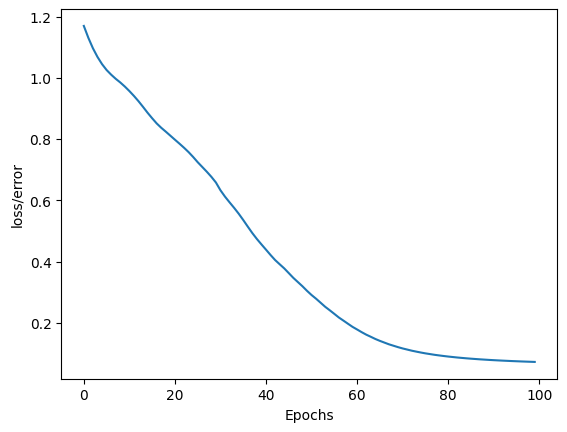

In [47]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epochs')

**Evaluate Model with test set**

In [48]:
with torch.no_grad(): # turn off back propagation
  #Evaluate model prediction using features from test set X
  y_eval = model.forward(X_test)

  #Calculate loss based on model evaluted prediction and actual clas test set
  loss= criterion(y_eval,y_test)

In [49]:
loss

tensor(0.0538)

In [50]:
correct =0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Compare outputs of evaluation results in tensor three features, actual y_test and evaluated y class
    print(f'{i+1} .)   {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Count the number of correctly predicted class
    if (y_val.argmax().item() == y_test[i]):
      correct+=1

print(f'Predicted correct class: {correct}.')

1 .)   tensor([-3.3646,  3.9392,  0.3720]) 	 1 	 1
2 .)   tensor([  7.5572,   1.1015, -11.3347]) 	 0 	 0
3 .)   tensor([  6.5957,   1.5027, -10.4091]) 	 0 	 0
4 .)   tensor([-3.3331,  4.2594,  0.0623]) 	 1 	 1
5 .)   tensor([-7.3782,  2.8087,  5.1605]) 	 2 	 2
6 .)   tensor([-7.3760,  3.9013,  4.2826]) 	 2 	 2
7 .)   tensor([  6.1971,   1.6470, -10.0047]) 	 0 	 0
8 .)   tensor([  6.6383,   1.4348, -10.4031]) 	 0 	 0
9 .)   tensor([-2.6753,  4.3091, -0.6392]) 	 1 	 1
10 .)   tensor([  7.1875,   1.3812, -11.0965]) 	 0 	 0
11 .)   tensor([-3.8318,  4.4027,  0.5246]) 	 1 	 1
12 .)   tensor([-8.6807,  1.9994,  6.8923]) 	 2 	 2
13 .)   tensor([-2.0678,  3.8200, -0.7571]) 	 1 	 1
14 .)   tensor([-1.0768,  4.3741, -2.2838]) 	 1 	 1
15 .)   tensor([-7.4965,  2.6207,  5.3287]) 	 2 	 2
16 .)   tensor([-8.6136,  1.5508,  7.1186]) 	 2 	 2
17 .)   tensor([-3.7761,  3.6462,  0.9487]) 	 1 	 1
18 .)   tensor([-6.7608,  2.7754,  4.5281]) 	 2 	 2
19 .)   tensor([-1.7048,  4.1980, -1.4670]) 	 1 	 1
20 .) 